#### Table of Contents
* Importing Libraries and Data
* PCA
* Dendrograms

### 1 Importing Libraries and Data

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [29]:
#import data
df=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\1 DATA\MANIPULATED DATA\df_unscaled.csv"))

In [30]:
#import pleasant weather data
pleasantdf=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\Other\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"))

In [31]:
df.head()

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [32]:
pleasantdf.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
df.columns.tolist()

['Unnamed: 0',
 'DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDO

In [34]:
#Reducing dataset
dfdecade = df[df['DATE'].astype(str).str.contains('199')]
dfdecade

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,10958,19900101,1,0,2.1,0.83,1.0217,0.60,0.00,0,...,3,0.82,1.0068,0.20,0.51,0,2.0,6.9,4.5,9.4
10959,10959,19900102,1,2,2.1,0.84,1.0238,0.48,0.00,0,...,5,0.79,1.0040,0.21,1.48,0,0.1,7.3,4.7,9.9
10960,10960,19900103,1,8,2.1,0.89,1.0231,0.20,0.00,0,...,4,0.90,1.0094,0.38,0.00,0,4.9,7.8,4.8,10.7
10961,10961,19900104,1,2,2.1,0.77,1.0265,0.54,0.00,0,...,6,0.93,1.0112,0.13,0.92,0,0.0,6.5,2.0,11.0
10962,10962,19900105,1,7,2.1,0.81,1.0286,0.23,0.04,0,...,4,0.91,1.0108,0.20,0.56,0,1.2,9.4,7.2,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,14605,19991227,12,7,2.1,0.74,0.9953,0.28,1.93,0,...,7,0.75,0.9954,0.15,0.41,0,0.1,4.8,3.0,7.5
14606,14606,19991228,12,8,2.1,0.88,0.9956,0.13,1.22,0,...,3,0.73,1.0102,0.41,0.03,0,5.1,5.3,2.5,8.1
14607,14607,19991229,12,8,2.1,0.84,1.0162,0.21,0.11,1,...,5,0.81,1.0229,0.35,0.85,0,3.9,7.1,4.2,9.1
14608,14608,19991230,12,7,2.1,0.80,1.0276,0.26,0.01,0,...,8,0.94,1.0171,0.14,0.27,0,0.0,8.4,5.5,11.2


In [35]:
# Scaling dfdecade for ML
scaler = StandardScaler()

In [36]:
df_scale = pd.DataFrame(scaler.fit_transform(dfdecade))

In [37]:
df_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,-1.731577,-1.586441,-1.60171,-2.301538,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,...,-1.680451,-0.075095,-0.633204,-1.047233,0.124855,-0.028673,-0.351473,-1.137322,-0.964327,-1.135425
1,-1.730628,-1.586406,-1.60171,-1.460175,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,...,-0.550975,-0.460994,-0.866248,-1.035329,1.526501,-0.028673,-0.868123,-1.028306,-0.913966,-1.006265
2,-1.729679,-1.586371,-1.60171,1.063914,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,...,-1.115713,0.953971,-0.416805,-0.832962,-0.612094,-0.028673,0.437099,-0.892035,-0.888786,-0.799609
3,-1.728731,-1.586336,-1.60171,-1.460175,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,...,0.013763,1.339870,-0.266991,-1.130561,0.717303,-0.028673,-0.895315,-1.246339,-1.593835,-0.722114
4,-1.727782,-1.586301,-1.60171,0.643233,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,...,-1.115713,1.082604,-0.300283,-1.047233,0.197104,-0.028673,-0.569010,-0.455969,-0.284458,-0.541290


In [38]:
df_scale.shape

(3652, 171)

In [39]:
df_scale.columns.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170]

In [40]:
df_scale=df_scale.drop([170,169,168],axis=1)

In [41]:
df=df.drop(['Unnamed: 0',
 'DATE',
 'MONTH',],axis=1)

In [42]:
# Copying columns headers from original temp dataset, pasting to scaled

columns=df.columns.values.tolist() #create a list of column names for your df
columns #list the columns

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [43]:
df_scale.columns=columns

In [44]:
len(df.columns)

168

In [45]:
len(df_scale.columns)

168

### 2 PCA

columns =[[
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max', 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max','GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max','OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max','VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']]

In [48]:
#scale
df2=df_scale
df2

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.731577,-1.586441,-1.601710,-2.301538,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,...,-1.552632,-1.419299,-1.546894,-1.680451,-0.075095,-0.633204,-1.047233,0.124855,-0.028673,-0.351473
1,-1.730628,-1.586406,-1.601710,-1.460175,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,...,-1.318084,-1.079495,-1.391200,-0.550975,-0.460994,-0.866248,-1.035329,1.526501,-0.028673,-0.868123
2,-1.729679,-1.586371,-1.601710,1.063914,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,...,-1.286811,-0.900651,-1.469047,-1.115713,0.953971,-0.416805,-0.832962,-0.612094,-0.028673,0.437099
3,-1.728731,-1.586336,-1.601710,-1.460175,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,...,-1.411903,-1.651796,-1.157659,0.013763,1.339870,-0.266991,-1.130561,0.717303,-0.028673,-0.895315
4,-1.727782,-1.586301,-1.601710,0.643233,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,...,-1.161719,-0.954304,-1.248481,-1.115713,1.082604,-0.300283,-1.047233,0.197104,-0.028673,-0.569010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,1.727782,1.586347,1.588052,0.643233,-0.12338,-0.113596,-2.886734,-1.096265,3.053937,-0.159903,...,-0.817715,-0.668153,-0.872221,0.578501,-0.975527,-1.582028,-1.106753,-0.019645,-0.028673,-0.868123
3648,1.728731,1.586382,1.588052,1.063914,-0.12338,1.225877,-2.849304,-1.261720,1.774682,-0.159903,...,-1.208628,-0.882766,-1.365251,-1.680451,-1.232793,-0.350221,-0.797251,-0.568744,-0.028673,0.491484
3649,1.729679,1.586417,1.588052,1.063914,-0.12338,0.843171,-0.279112,-1.173478,-0.225280,0.403771,...,-1.411903,-1.472952,-1.274430,-0.550975,-0.203728,0.706803,-0.868674,0.616153,-0.028673,0.165178
3650,1.730628,1.586452,1.588052,0.643233,-0.12338,0.460464,1.143227,-1.118326,-0.405457,-0.159903,...,-1.396266,-1.562374,-1.183608,1.143238,1.468504,0.224067,-1.118657,-0.221945,-0.028673,-0.895315


scaled_features

In [49]:
#creating PCA for scaled data
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(df2)

In [50]:
principalComponents

array([[11.63712694, -2.4354381 , -2.33022882, ...,  2.97992856,
        -0.37167784, -0.99625579],
       [11.88040077, -2.34633365, -1.74911891, ...,  1.82209963,
        -0.59523248,  0.42339064],
       [12.08953328, -1.74265465, -1.58589349, ...,  1.2173685 ,
        -1.61911111, -0.36661347],
       ...,
       [11.33901341,  1.63970571,  3.11494781, ...,  1.82182497,
         2.10244101, -2.71830257],
       [11.66144194, -0.81117678, -2.53181233, ...,  0.7437857 ,
         2.35626831,  0.98906128],
       [12.18254069, -1.79289014, -3.45700557, ...,  1.65607108,
         2.30664411,  0.2928863 ]])

In [51]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8'])

In [52]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,11.637127,-2.435438,-2.330229,0.497870,-2.370968,2.979929,-0.371678,-0.996256
1,11.880401,-2.346334,-1.749119,-0.291739,-1.978541,1.822100,-0.595232,0.423391
2,12.089533,-1.742655,-1.585893,-0.308433,-1.436752,1.217369,-1.619111,-0.366613
3,11.049550,-4.778701,-3.181739,1.089403,0.249050,-0.041101,-0.759669,1.454038
4,11.012395,-3.077041,-4.580531,-1.145599,0.457675,1.441432,-2.827878,1.260249
...,...,...,...,...,...,...,...,...
3647,9.272338,9.357069,5.242506,3.065217,-1.802185,2.014035,3.274092,-0.266250
3648,10.468388,8.841646,8.011737,-2.425023,-1.659347,2.206250,3.310419,-1.324030
3649,11.339013,1.639706,3.114948,-1.072403,-1.574932,1.821825,2.102441,-2.718303
3650,11.661442,-0.811177,-2.531812,-0.696275,0.517225,0.743786,2.356268,0.989061


#reducing dataset to a year range
yeardf=df[df['DATE'].astype(str).str.contains('199')]
print(yeardf)

#dropping unscaled data
scaledf = yeardf.drop(['DATE','MONTH','Unnamed: 0'], axis=1)

scaledf.head()

#exporting reduced dataset
scaledf.to_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\1 DATA\MANIPULATED DATA\reduced_nodate_scaled_df.csv'))

#exporting reduced dataset
yeardf.to_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\1 DATA\MANIPULATED DATA\reduced_199_scaled_df.csv'))

### 3 Dendrograms

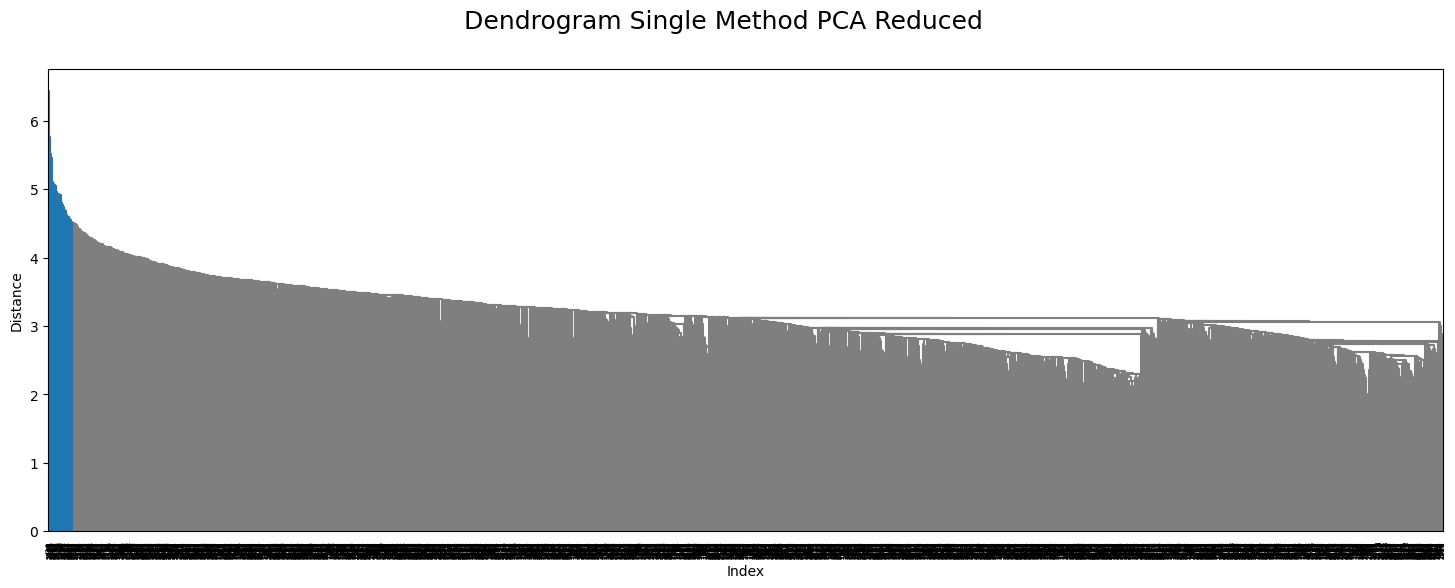

In [53]:
#single method
dendro_single = linkage(dfPCA.loc[:,['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8']],method="single")
plt.figure(figsize=(18,6))
dendrogram(dendro_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method PCA Reduced",fontsize=18)
plt.show()

In [54]:
#single table
yeardf_SM=dfPCA.copy()

yeardf_SM['clust2']=fcluster(dendro_single,2, criterion='maxclust')
yeardf_SM['clust3']=fcluster(dendro_single,3, criterion='maxclust')
yeardf_SM.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,clust2,clust3
0,11.637127,-2.435438,-2.330229,0.497870,-2.370968,2.979929,-0.371678,-0.996256,1,1
1,11.880401,-2.346334,-1.749119,-0.291739,-1.978541,1.822100,-0.595232,0.423391,1,1
2,12.089533,-1.742655,-1.585893,-0.308433,-1.436752,1.217369,-1.619111,-0.366613,1,1
3,11.049550,-4.778701,-3.181739,1.089403,0.249050,-0.041101,-0.759669,1.454038,1,1
4,11.012395,-3.077041,-4.580531,-1.145599,0.457675,1.441432,-2.827878,1.260249,1,1


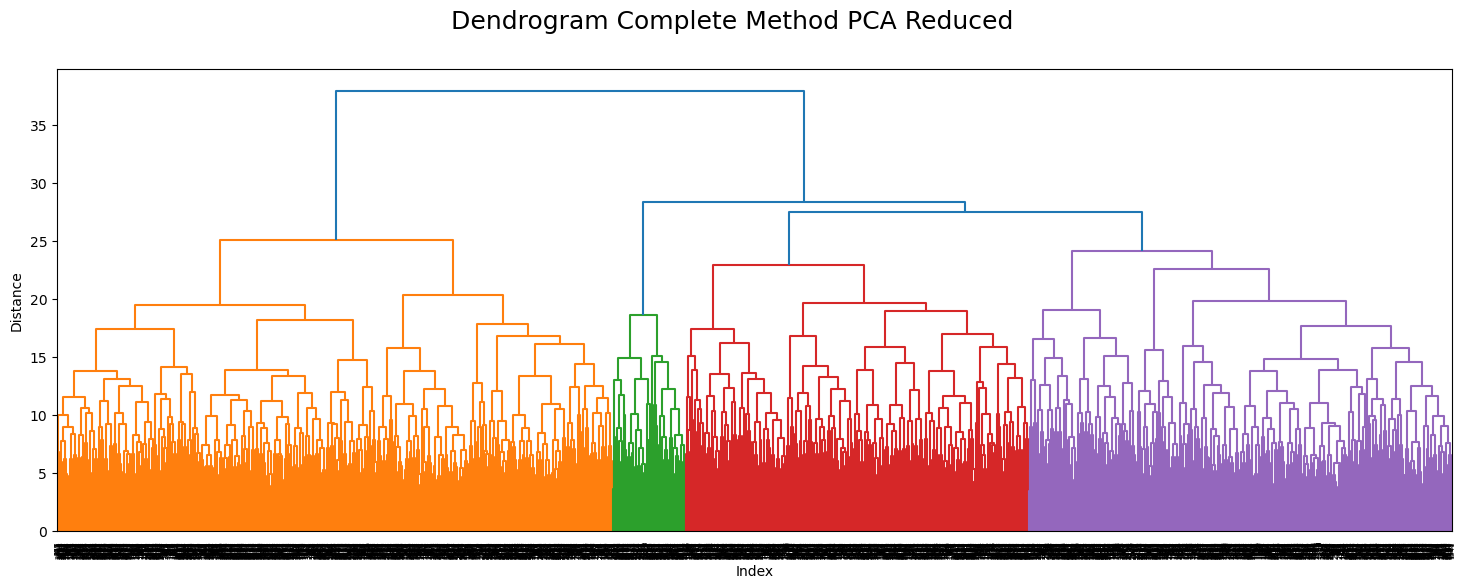

In [55]:
#dendro complete
dendro_complete = linkage(dfPCA.loc[:,['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(dendro_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method PCA Reduced",fontsize=18)
plt.show()

In [56]:
#complete dataframe
yeardf_CM=dfPCA.copy()

yeardf_CM['clust2']=fcluster(dendro_complete,2, criterion='maxclust')
yeardf_CM['clust3']=fcluster(dendro_complete,3, criterion='maxclust')
yeardf_CM.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,clust2,clust3
0,11.637127,-2.435438,-2.330229,0.497870,-2.370968,2.979929,-0.371678,-0.996256,2,2
1,11.880401,-2.346334,-1.749119,-0.291739,-1.978541,1.822100,-0.595232,0.423391,2,2
2,12.089533,-1.742655,-1.585893,-0.308433,-1.436752,1.217369,-1.619111,-0.366613,2,2
3,11.049550,-4.778701,-3.181739,1.089403,0.249050,-0.041101,-0.759669,1.454038,2,3
4,11.012395,-3.077041,-4.580531,-1.145599,0.457675,1.441432,-2.827878,1.260249,2,3


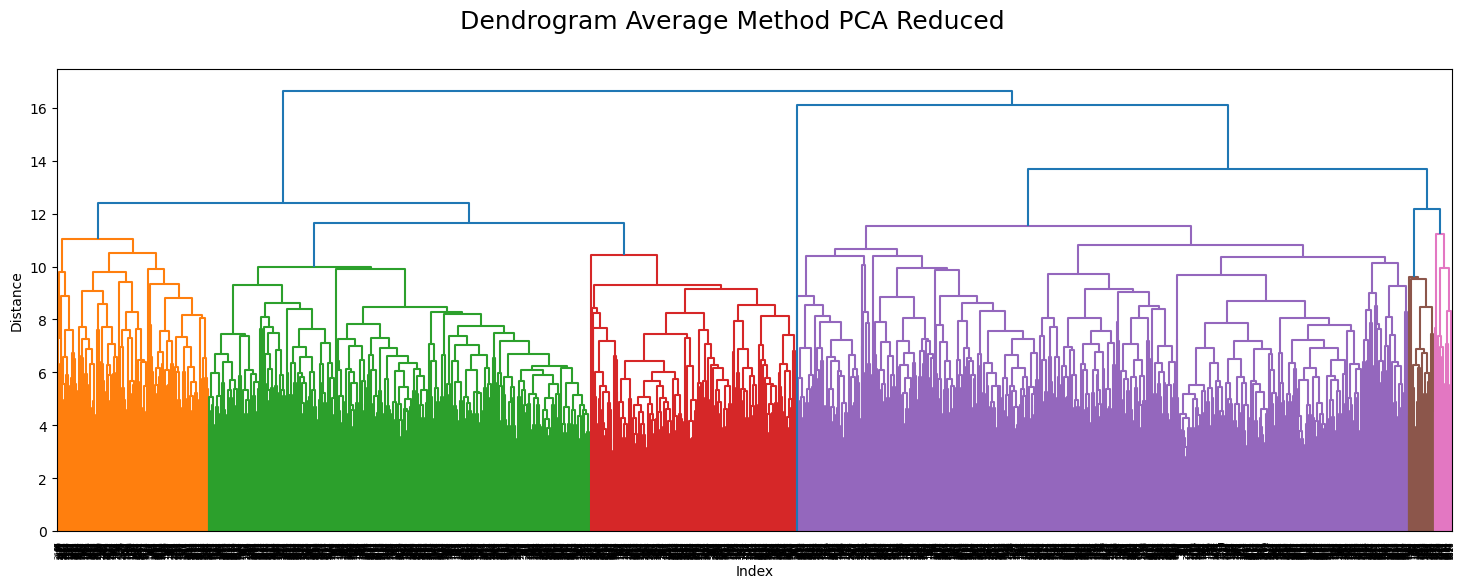

In [57]:
#dendro average
dendro_average = linkage(dfPCA.loc[:,['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8']],method="average")
plt.figure(figsize=(18,6))
dendrogram(dendro_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method PCA Reduced",fontsize=18)
plt.show()

In [58]:
#average dataframe
yeardf_AVG=dfPCA.copy()

yeardf_AVG['clust2']=fcluster(dendro_average,2, criterion='maxclust')
yeardf_AVG['clust3']=fcluster(dendro_average,3, criterion='maxclust')
yeardf_AVG.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,clust2,clust3
0,11.637127,-2.435438,-2.330229,0.497870,-2.370968,2.979929,-0.371678,-0.996256,2,2
1,11.880401,-2.346334,-1.749119,-0.291739,-1.978541,1.822100,-0.595232,0.423391,2,2
2,12.089533,-1.742655,-1.585893,-0.308433,-1.436752,1.217369,-1.619111,-0.366613,2,2
3,11.049550,-4.778701,-3.181739,1.089403,0.249050,-0.041101,-0.759669,1.454038,2,2
4,11.012395,-3.077041,-4.580531,-1.145599,0.457675,1.441432,-2.827878,1.260249,2,2


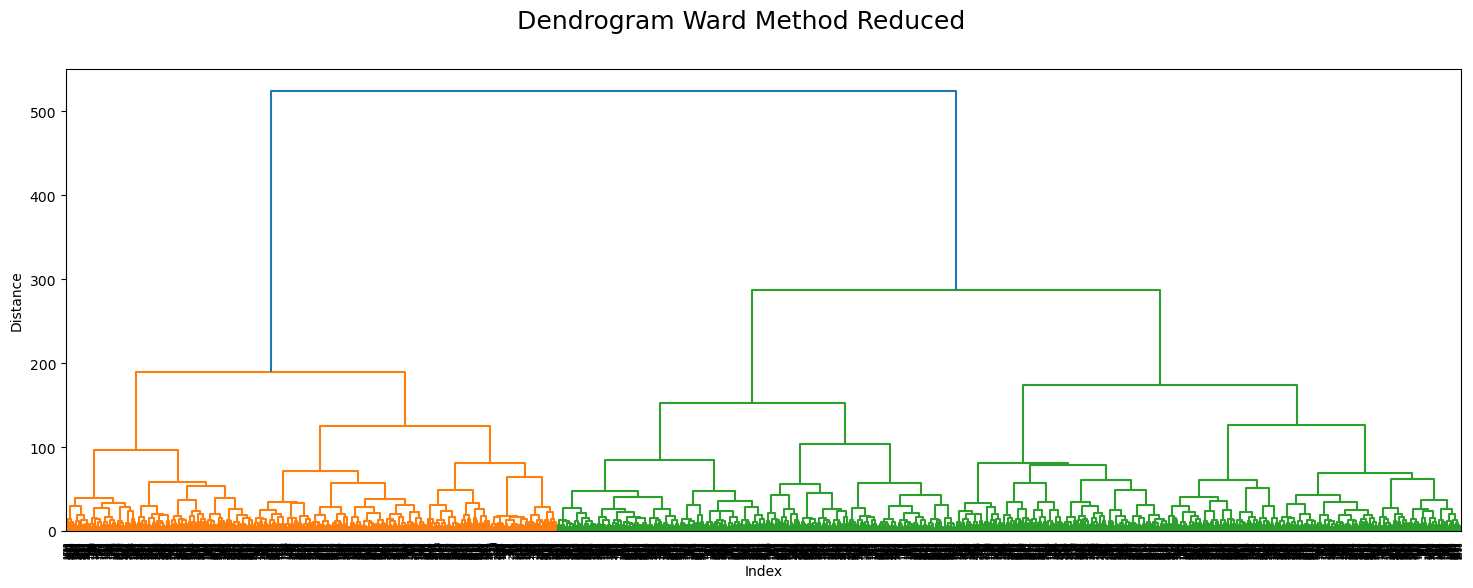

In [60]:
#dendro ward
dendro_ward = linkage(dfPCA.loc[:,['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(dendro_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method Reduced",fontsize=18)
plt.show()

In [61]:
#ward dataframe
yeardf_WM=dfPCA.copy()

yeardf_WM['clust2']=fcluster(dendro_ward,2, criterion='maxclust')
yeardf_WM['clust3']=fcluster(dendro_ward,3, criterion='maxclust')
yeardf_WM.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,clust2,clust3
0,11.637127,-2.435438,-2.330229,0.497870,-2.370968,2.979929,-0.371678,-0.996256,1,1
1,11.880401,-2.346334,-1.749119,-0.291739,-1.978541,1.822100,-0.595232,0.423391,1,1
2,12.089533,-1.742655,-1.585893,-0.308433,-1.436752,1.217369,-1.619111,-0.366613,1,1
3,11.049550,-4.778701,-3.181739,1.089403,0.249050,-0.041101,-0.759669,1.454038,1,1
4,11.012395,-3.077041,-4.580531,-1.145599,0.457675,1.441432,-2.827878,1.260249,1,1


In [64]:
#Look at all of the confusion matrices results together.
print("SINGLE")
print(pd.crosstab(yeardf_SM['PCA1'],yeardf_SM["clust3"]))
print("COMPLETE")
print(pd.crosstab(yeardf_CM['PCA1'],yeardf_CM["clust3"]))
print("AVERAGE")
print(pd.crosstab(yeardf_AVG['PCA1'],yeardf_AVG["clust3"]))
print("WARD")
print(pd.crosstab(yeardf_WM['PCA1'],yeardf_WM["clust3"]))

SINGLE
clust3      1  2  3
PCA1               
-17.633421  1  0  0
-17.629268  1  0  0
-17.339545  1  0  0
-17.173313  1  0  0
-17.157675  1  0  0
...        .. .. ..
 16.623142  1  0  0
 16.858510  1  0  0
 17.623306  1  0  0
 18.105836  1  0  0
 18.311986  1  0  0

[3652 rows x 3 columns]
COMPLETE
clust3      1  2  3
PCA1               
-17.633421  1  0  0
-17.629268  1  0  0
-17.339545  1  0  0
-17.173313  1  0  0
-17.157675  1  0  0
...        .. .. ..
 16.623142  0  1  0
 16.858510  0  1  0
 17.623306  0  1  0
 18.105836  0  1  0
 18.311986  0  1  0

[3652 rows x 3 columns]
AVERAGE
clust3      1  2  3
PCA1               
-17.633421  1  0  0
-17.629268  1  0  0
-17.339545  1  0  0
-17.173313  1  0  0
-17.157675  1  0  0
...        .. .. ..
 16.623142  0  1  0
 16.858510  0  1  0
 17.623306  0  1  0
 18.105836  0  1  0
 18.311986  0  1  0

[3652 rows x 3 columns]
WARD
clust3      1  2  3
PCA1               
-17.633421  0  1  0
-17.629268  0  1  0
-17.339545  0  1  0
-17.173313  0  1